In [ ]:
import pandas as pd
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tested.csv to tested (1).csv


In [ ]:
file_name=next(iter(uploaded))
titanic_data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print(titanic_data.isnull().sum())
print(titanic_data.columns)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
non_numeric_cols = titanic_data.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)

titanic_data = titanic_data.drop(non_numeric_cols, axis=1)
print(titanic_data.columns)

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Accuracy: 0.5833333333333334


In [ ]:
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<ipython-input-46-2f80a4868005>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',width=0.5 ,data=titanic_data.replace({0:'No',1:'Yes'}),


<Axes: xlabel='survived', ylabel='count'>

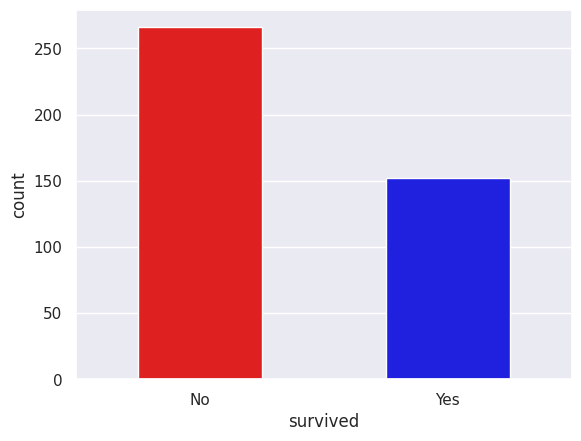

In [ ]:
titanic_data['survived']=titanic_data['Survived'].replace({0:'No',1:'Yes'})
sns.set()
sns.countplot(x='survived',width=0.5 ,data=titanic_data.replace({0:'No',1:'Yes'}),
              order=['No','Yes'], palette=['red','blue',])

<ipython-input-47-f6e4e0b10129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', width=0.3, data=titanic_data_replaced, order=['First', 'Second', 'Third'], palette='Set2')


<Axes: xlabel='Pclass', ylabel='count'>

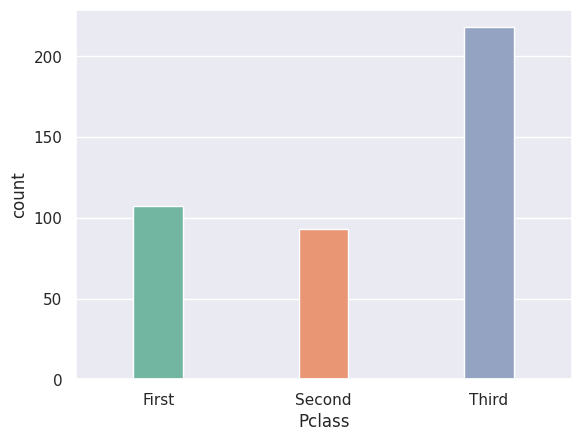

In [ ]:
titanic_data_replaced = titanic_data.replace({'Pclass': {1: 'First', 2: 'Second', 3: 'Third'}})
sns.set()
sns.countplot(x='Pclass', width=0.3, data=titanic_data_replaced, order=['First', 'Second', 'Third'], palette='Set2')


<Axes: xlabel='Pclass', ylabel='count'>

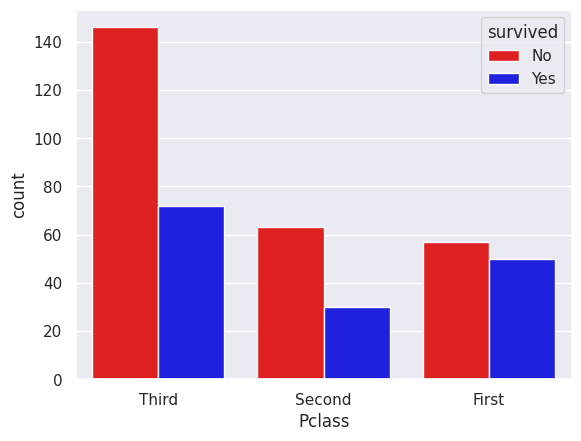

In [ ]:
titanic_data['Pclass'] = titanic_data['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'})
sns.countplot(x='Pclass', hue='survived', data=titanic_data, palette={'Yes': 'blue', 'No': 'red'})


In [ ]:
# Separate the features (X) and the target variable (y)
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (334, 10)
Test set size: (84, 10)


In [ ]:
# Feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # RBF kernel for non-linear decision boundaries
svm_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.9880952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Confusion Matrix:
[[50  0]
 [ 1 33]]
